In [1]:
import pandas as pd
import pandasql as ps
from urllib.request import urlopen
import urllib.request
import requests
import time 
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

 ## Proyecto final
 1. Barrientos Bonilla Esmeralda
 2. Garcia Aguilar Maricruz
 3. Hernández Norberto Dana Berenice
 4. Jimenez Gonzalez Juan Antonio

In [11]:
df= pd.DataFrame()
df.to_excel("Datos_Marchand.xlsx")

In [12]:
df1= pd.DataFrame()
df1.to_excel("Datos_Lumen.xlsx")

In [13]:
df2= pd.DataFrame()
df2.to_excel("Datos_OfficeDepot.xlsx")

In [14]:
df3= pd.DataFrame()
df3.to_excel("Datos_Papeleria.xlsx")

### Web Scrapper Marchand

In [6]:
def Buscador_Marchand(producto):
    path = "C:\WebDriver\chromedriver"
    driver= webdriver.Chrome(path)
    url = 'https://www.marchand.com.mx/search/'+producto
    driver.get(url)

    productos= driver.find_elements_by_class_name("cx-product-search-list")
    

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("cx-product-name")[0].text)
        except:
            lista_nombres.append(np.nan)

            
    lista_precios=list()
    lista_promos= list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("cx-product-price")[0].text)
            lista_promos.append(np.nan)
        except:
            lista_precios.append(np.nan)
            lista_promos.append(np.nan)




    df_marchand =pd.DataFrame({"Nombre":lista_nombres,"Precio":lista_precios,"Promociones":lista_promos})
    df_marchand["Autoservicio"]= "Marchand"
    df_marchand["Producto"]= producto
    df_marchand["Fecha"]= time.strftime("%d/%m/%y")

    df_marchand = df_marchand[["Fecha","Autoservicio","Producto","Nombre","Precio","Promociones"]]
    df_marchand  =df_marchand.reset_index(drop=True)
    
    
    d_marchand=pd.read_excel("Datos_Marchand.xlsx")
    d_marchand= pd.concat([d_marchand,df_marchand],axis=0)
    d_marchand.to_excel("Datos_Marchand.xlsx",index=False)


    driver.quit()
    return df_marchand


### Web Scrapper Lumen

In [7]:
def Buscador_Lumen(producto):
    path = "C:\WebDriver\chromedriver"
    driver= webdriver.Chrome(path)
    url = 'https://lumen.com.mx/search?q='+producto+'&orderby=6&pagesize=12'
    driver.get(url)
    
    

    productos= driver.find_elements_by_class_name("item-box")
    

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("product-title")[0].text)
        except:
            lista_nombres.append(np.nan)

            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price.actual-price")[0].text)
            lista_promos.append(np.nan)
        except:
            try:
                lista_precios.append(productos[i].find_elements_by_class_name("price.old-price")[0].text)
                lista_promos.append(productos[i].find_elements_by_class_name("price.discount-price")[0].text)
            except:
                lista_precios.append(np.nan)
                lista_promos.append(np.nan)




    df_lumen =pd.DataFrame({"Nombre":lista_nombres,"Precio":lista_precios, "Promociones":lista_promos})
    df_lumen["Autoservicio"]= "Lumen"
    df_lumen["Producto"]= producto
    df_lumen["Fecha"]= time.strftime("%d/%m/%y")

    df_lumen = df_lumen[["Fecha","Autoservicio","Producto","Nombre","Precio","Promociones"]]
    df_lumen  =df_lumen.reset_index(drop=True)
    
    
    d_lumen=pd.read_excel("Datos_Lumen.xlsx")
    d_lumen= pd.concat([d_lumen,df_lumen],axis=0)
    d_lumen.to_excel("Datos_Lumen.xlsx",index=False)


    driver.quit()
    return df_lumen

### Web Scrapper Office Depot

In [8]:
def Buscador_Office(producto):
    path = "C:\WebDriver\chromedriver"
    driver= webdriver.Chrome(path)
    url = 'https://www.officedepot.com.mx/officedepot/en/search/?text='+producto
    driver.get(url)
    
    

    productos= driver.find_elements_by_class_name("product-item")
    

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("contnet-name")[0].text)
        except:
            lista_nombres.append(np.nan)

            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("beforePrice-grid.cont-price-grid")[0].text)
            lista_promos.append(productos[i].find_elements_by_class_name("discountedPrice-grid.cont-price-grid.bp-original")[0].text)
        except:
            try:
                lista_precios.append(productos[i].find_elements_by_class_name("prices-container")[0].text)
                lista_promos.append(np.nan)
            except:
                lista_precios.append(np.nan)
                lista_promos.append(np.nan)




    df_office =pd.DataFrame({"Nombre":lista_nombres,"Precio":lista_precios,"Promociones":lista_promos})
    df_office["Autoservicio"]= "Office Depot"
    df_office["Producto"]= producto
    df_office["Fecha"]= time.strftime("%d/%m/%y")

    df_office = df_office[["Fecha","Autoservicio","Producto","Nombre","Precio","Promociones"]]
    df_office  =df_office.reset_index(drop=True)
    df_office = df_office[df_office['Nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    
    
    d_office=pd.read_excel("Datos_OfficeDepot.xlsx")
    d_office= pd.concat([d_office,df_office],axis=0)
    d_office.to_excel("Datos_OfficeDepot.xlsx",index=False)


    driver.quit()
    return df_office

## Productos extraidos

Elegimos extraer productos de papelería como resistol, boligrafos o plumas, plumones stabilo y crayolas ya que son productos comunes de papelería y podemos encontrar varios resultados en las páginas web.

In [15]:
for producto in ["resistol","boligrafo","stabilo","crayones crayola"]:
    Buscador_Marchand(producto)
    Buscador_Lumen(producto)
    Buscador_Office(producto)

### Productos Marchand

In [16]:
datosM = pd.read_excel("Datos_Marchand.xlsx")
datosM 

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 35GR PZ1,$12.17,NaN
1,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 500GR PZ1,$80.21,NaN
2,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 225GR PZ1,$48.12,NaN
3,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL LAPIZ ADHES 40GR CH5,$169.30,NaN
4,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL LAPIZ ADHES 10GR CH12,$131.04,NaN
5,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL LAPIZ ADHES 20GR CH12,$220.08,NaN
6,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 1000GR PZ1,$133.86,NaN
7,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 110GR PZ1,$25.99,NaN
8,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 55GR PZ1,$18.80,NaN
9,09/02/21,Marchand,boligrafo,BOLÍGRAFO E ZEBRA STYLUS / NEGRO / CJE1,$226.25,NaN


### Productos Lumen

In [17]:
datosL = pd.read_excel("Datos_Lumen.xlsx")
datosL 

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Lumen,resistol,RESISTOL 5000 21ML,$45.00 MXN,NaN
1,09/02/21,Lumen,resistol,PEGAMENTO UNIVERSAL UHU FRASCO 90ML,$111.00 MXN,NaN
2,09/02/21,Lumen,resistol,PEGAMENTO UNIVERSAL UHU 35ML,$47.90 MXN,NaN
3,09/02/21,Lumen,resistol,PEGAMENTO UNIVERSAL UHU 20ML,$35.00 MXN,NaN
4,09/02/21,Lumen,resistol,PEGAMENTO EN GEL ELMERS GEL 225 ML,$40.90 MXN,NaN
5,09/02/21,Lumen,resistol,PEGAMENTO EN CUADRITO PRITT TAK,$42.00 MXN,NaN
6,09/02/21,Lumen,resistol,PEGAMENTO BLANCO RESISTOL 850 55G,$22.90 MXN,NaN
7,09/02/21,Lumen,resistol,PEGAMENTO BLANCO RESISTOL 850 500G,$85.50 MXN,NaN
8,09/02/21,Lumen,resistol,PEGAMENTO BLANCO RESISTOL 850 225G,$48.50 MXN,NaN
9,09/02/21,Lumen,resistol,PEGAMENTO BLANCO RESISTOL 850 1KG,$152.00 MXN,NaN


### Productos Office Depot

In [18]:
datosOf = pd.read_excel("Datos_OfficeDepot.xlsx")
datosOf 

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Office Depot,resistol,"PEGAMENTO RESISTOL 5000 (1 PZA., 21 ML)",$43.00,NaN
1,09/02/21,Office Depot,resistol,"PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (500GR, ...",$87.00,NaN
2,09/02/21,Office Depot,resistol,"PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (110GR, ...",$29.00,NaN
3,09/02/21,Office Depot,resistol,"PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (225GR, ...",$53.00,NaN
4,09/02/21,Office Depot,resistol,"PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (1 PZA.,...",$153.00,NaN
5,09/02/21,Office Depot,resistol,"PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (55GR,1 ...",$23.00,NaN
6,09/02/21,Office Depot,resistol,"PEGAMENTO RESISTOL 911 LIQUIDO (1 PZA., 2 GR)",$25.00,NaN
7,09/02/21,Office Depot,resistol,"PEGAMENTO RESISTOL 911 BROCHA (1 PZA., 5 GR)",$40.00,NaN
8,09/02/21,Office Depot,resistol,"PEGAMENTO RESISTOL 60 SEGUNDOS (20 GR, 1 PZA.)",$100.00,NaN
9,09/02/21,Office Depot,resistol,"PEGAMENTO RESISTOL SUPER 5000 (1 PZA., 21 ML)",$43.00,NaN


Con esta función de precios_floats nuestra intención es eliminar los signos de peso y tambien los "MXN" en la columna de precios, ya que con estos son considerados tipo "object" si queremos, esto con el fin de que más adelante podamos realizar consultas con el paquete pandasql.

In [19]:
def precios_floats(datos):

    
    for i in range(len(datos["Precio"])):
        try:
            datos["Precio"].iloc[i]=datos["Precio"].iloc[i].strip("$")
        except:
            pass
        
        
    for i in range(len(datos["Precio"])):
        try:
            datos["Precio"].iloc[i]=datos["Precio"].iloc[i].strip("MXN")
        except:
            pass
        
        
    for i in range(len(datos["Promociones"])):
        try:
            datos["Promociones"].iloc[i]=datos["Promociones"].iloc[i].strip("$")
        except:
            pass    
    
    for i in range(len(datos["Promociones"])):
        try:
            datos["Promociones"].iloc[i]=datos["Promociones"].iloc[i].strip("MXN")
        except:
            pass
    
  
    
    datos["Precio"]=datos["Precio"].replace(",","",regex=True)
    datos["Promociones"]=datos["Promociones"].replace(",","",regex=True)
    
    
    datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')
    datos['Promociones'] = pd.to_numeric(datos['Promociones'], errors='coerce')


    print(datos.dtypes)
    return datos

In [20]:
datos_papeleria = pd.read_excel("Datos_Papeleria.xlsx")
datos_papeleria=pd.concat([datos_papeleria,datosM,datosL,datosOf],axis=0)
datos_papeleria = precios_floats(datos_papeleria)
datos_papeleria.to_excel("Datos_Papeleria.xlsx",index= False)

Fecha            object
Autoservicio     object
Producto         object
Nombre           object
Precio          float64
Promociones     float64
dtype: object


## Productos de Papeleria

In [21]:
datosp=pd.read_excel("Datos_Papeleria.xlsx")
datosp

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 35GR PZ1,12.17,NaN
1,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 500GR PZ1,80.21,NaN
2,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL 850 BLANCO 225GR PZ1,48.12,NaN
3,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL LAPIZ ADHES 40GR CH5,169.30,NaN
4,09/02/21,Marchand,resistol,PEGAMENTO RESISTOL LAPIZ ADHES 10GR CH12,131.04,NaN
...,...,...,...,...,...,...
128,09/02/21,Office Depot,crayones crayola,"CRAYONES CRAYOLA JUMBO TRIANGULAR (COLORES, 12...",49.00,NaN
129,09/02/21,Office Depot,crayones crayola,"CRAYONES CRAYOLA TWISTABLES X (COLORES, 8 PZS.)",73.00,NaN
130,09/02/21,Office Depot,crayones crayola,"CRAYONES CRAYOLA JUMBO TRIANGULAR (COLORES, 24...",94.50,NaN
131,09/02/21,Office Depot,crayones crayola,"CRAYONES CRAYOLA SO BIG (COLORES, 12 PZS.)",68.00,NaN


## Consultas pandasql

En estas primeras consultas podemos ver que no existen muchas promociones en este tipo de articulos, sin embargo, en el video mencionamos que existian solo 2 promociones el dia 8 de febrero, sin embargo, hoy 9 de febrero, existen 7 promociones disponibles. Así como un aumento en el precio en promedio de los articulos por tienda y por producto.

In [22]:
ps.sqldf("select Autoservicio, count(Promociones) as NumPromociones from datosp group by Autoservicio")

,Autoservicio,NumPromociones
0,Lumen,1
1,Marchand,0
2,Office Depot,6


In [23]:
ps.sqldf("select Producto, count(Promociones) as NumPromociones from datosp group by Producto")

,Producto,NumPromociones
0,boligrafo,1
1,crayones crayola,0
2,resistol,1
3,stabilo,5


Con respecto a las siguientes dos consultas, podemos ver que en promedio, la tienda con precios más altos es Lumen y la tienda con precios más bajos es Marchand. Por otro lado, con respecto a los productos, el producto que en promedio tiene un mayor costo son los stabilo y los de menor costo son las crayolas.

In [24]:
ps.sqldf("select Autoservicio,AVG(Precio) as Promedio from datosp group by Autoservicio")

,Autoservicio,Promedio
0,Lumen,136.984444
1,Marchand,103.231795
2,Office Depot,122.867347


In [26]:
ps.sqldf("select Producto,AVG(Precio) as Promedio from datosp group by Producto")

,Producto,Promedio
0,boligrafo,77.535862
1,crayones crayola,63.231379
2,resistol,69.151842
3,stabilo,256.778919


Aquí, como dato util podemos ver la cantidad de productos que tenemos tanto por tienda, como por articulo.

In [27]:
ps.sqldf("select Producto, count(Producto) as NumProductos from datosp group by Producto")

,Producto,NumProductos
0,boligrafo,29
1,crayones crayola,29
2,resistol,38
3,stabilo,37


In [44]:
ps.sqldf("select Autoservicio, count(Producto) as NumProductos from datosp group by Autoservicio")

,Autoservicio,NumProductos
0,Lumen,45
1,Marchand,39
2,Office Depot,49


En el caso de que tengamos un presupuesto limitado para comprar ciertos productos como los stabilo, en este caso dimos un limite de 150 pesos para comprar un producto de la marca stabilo, los cuales son plumones y marcatextos. Resultó que un 32.43% de los resultados encontrados en las página entran dentro de nuestro presupuesto. Cabe mencionar que ninguno de ellos es de la página web de Marchand a pesar de que esta tienda tiene el promedio en precios más bajo, por el nombre de los articulos podemos notar que son plumones individuales o un paquete con menos de 7 piezas.

In [28]:
ps.sqldf("select * from datosp where Producto is 'stabilo' and Precio<150")

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Lumen,stabilo,PLUMONES STABILO B88 POINT 88 CON 3,72.9,NaN
1,09/02/21,Lumen,stabilo,PLUMONES STABILO 8805-1 POINT 88 NEÓN CON 5,123.0,NaN
2,09/02/21,Lumen,stabilo,PLUMIL STABILO POINT 88 NEÓN,25.9,NaN
3,09/02/21,Lumen,stabilo,PLUMIL STABILO POINT 88 NEÓN,25.9,NaN
4,09/02/21,Lumen,stabilo,PLUMIL STABILO POINT 88 NEÓN,25.9,NaN
5,09/02/21,Office Depot,stabilo,ROTULADORES STABILO POINT 88 (5 PZS.),115.0,80.5
6,09/02/21,Office Depot,stabilo,"MARCATEXTOS STABILO BOSS (NARANJA, 2 PZS.)",39.5,NaN
7,09/02/21,Office Depot,stabilo,"MARCATEXTOS STABILO BOSS (AMARILLO, 2 PZS.)",39.5,NaN
8,09/02/21,Office Depot,stabilo,"ROTULADOR STABILO POINT 88 (COLORES, 6 PZS.)",135.0,NaN
9,09/02/21,Office Depot,stabilo,"MARCATEXTOS STABILO BOSS (ROSA/MENTA, 2 PZS.)",42.0,NaN


Los boligrafos o plumas son productos que pueden ir desde las plumas comerciales que todos hemos utilizado, hasta las plumas fuente, en estas consultas podemos destacar la diferencia de precios y productos en las diferentes tiendas, podemos ver que un 66.66% de los boligrafos con un costo mayor a $100 se encuentran en Lumen. 

Por otro lado el 40% de los boligrafos con un costo menor a $100 se encuentran en la papeleria Marchand.

In [29]:
ps.sqldf("select * from datosp where Producto is 'boligrafo' and Precio<100")

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Marchand,boligrafo,BOLÍGRAFO PAPER MATE KILOMÉTRICO 100 / RETRÁCT...,54.72,NaN
1,09/02/21,Marchand,boligrafo,BOLÍGRAFO AZOR-POINT / SURTIDO / BLISTER CON 8,49.49,NaN
2,09/02/21,Marchand,boligrafo,BOLÍGRAFO AMIGOS MEDIANO / AZUL / CAJA CON 12,26.52,NaN
3,09/02/21,Marchand,boligrafo,BOLÍGRAFO AMIGOS MEDIANO / ROJO / CAJA CON 12,26.52,NaN
4,09/02/21,Marchand,boligrafo,BOLÍGRAFO PUNTO MEDIANO / KILOMÉTRICO 100 / PU...,42.60,NaN
5,09/02/21,Marchand,boligrafo,BOLÍGRAFO AMIGOS MEDIANO / NEGRO / CAJA CON 12,26.52,NaN
6,09/02/21,Marchand,boligrafo,BOLÍGRAFO PAPER MATE KILOMÉTRICO 100 / RETRÁCT...,54.72,NaN
7,09/02/21,Marchand,boligrafo,BOLÍGRAFO PAPER MATE KILOMÉTRICO 100 / RETRÁCT...,54.72,NaN
8,09/02/21,Lumen,boligrafo,ROLLER SCHNEIDER BASE BALL 188373 MEDIANO,88.50,75.23
9,09/02/21,Lumen,boligrafo,RESPUESTO SHEAFFER 97525 PARA BOLÍGRAFO,90.50,NaN


In [30]:
ps.sqldf("select * from datosp where Producto is 'boligrafo' and Precio>100")

,Fecha,Autoservicio,Producto,Nombre,Precio,Promociones
0,09/02/21,Marchand,boligrafo,BOLÍGRAFO E ZEBRA STYLUS / NEGRO / CJE1,226.25,None
1,09/02/21,Marchand,boligrafo,BOLÍGRAFO PAPER MATE KILOMÉTRICO 300 / RETRÁCT...,122.28,None
2,09/02/21,Lumen,boligrafo,SWITCH COVERTIDOR A PORTAMINAS CROSS 8780,215.00,None
3,09/02/21,Lumen,boligrafo,RESPUESTO CARAN D ACHE 8422 PARA BOLÍGRAFO G ...,190.00,None
4,09/02/21,Lumen,boligrafo,REPUESTO SCHNEIDER 755 PARA BOLÍGRAFO ID,101.00,None
5,09/02/21,Lumen,boligrafo,REPUESTO PILOT PARA BOLÍGRAFO FRIXION POINT ...,108.00,None
6,09/02/21,Lumen,boligrafo,REPUESTO PILOT PARA BOLÍGRAFO FRIXION POINT ...,108.00,None
7,09/02/21,Lumen,boligrafo,REPUESTO PARA BOLÍGRAFO LANCELOT,107.00,None
8,09/02/21,Office Depot,boligrafo,"BOLIGRAFO ZEBRA SLIDE PEN (GRIS, 1 PZA.)",179.00,None


## Graficos

In [31]:
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

En estos 2 primeros graficos podemos observar como estan distribuidos los precios de los productos, en el primer grafico por cada tienda y en el segundo por cada producto, podemos ver que los precios de los productos varían, que los precios en Marchand son de un precio más uniforme, su rango de precios no rebasa los 300 pesos.
Por otro lado, tambien podemos notar que los precios de las tiendas de Lumen y Office Depot se encuentran más dispersos, suponemos que eso se debe a las marcas. Así mismo pasa con los stabilo, como mencionamos anteriormente, en estas tiendas venden desde un plumon stabilo individual hasta paquetes de 25 plumones así que es logico que los precios se encuentren dispersos.

Text(5.960000000000001, 0.5, 'Precio')

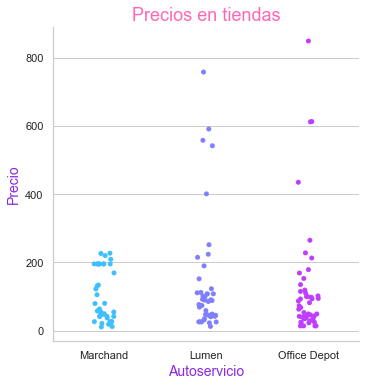

In [33]:
sns.catplot(x='Autoservicio', y='Precio', data= datosp ,estimator= np.mean, palette='cool')
sns.set(style="whitegrid")
plt.title("Precios en tiendas", color = "hotpink", size = 18)
plt.xlabel("Autoservicio", color = "blueviolet", size = 14)
plt.ylabel("Precio", color = "blueviolet", size = 14)

<function matplotlib.pyplot.show(close=None, block=None)>

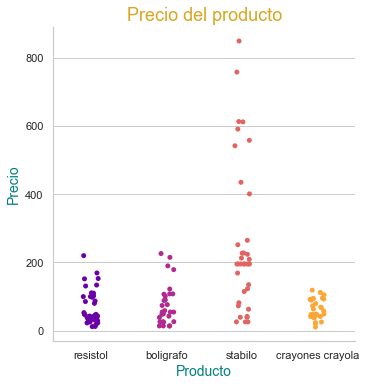

In [34]:
sns.catplot(x='Producto', y='Precio', data= datosp ,estimator= np.mean, palette='plasma')
plt.title("Precio del producto", color = "goldenrod", size = 18)
plt.xlabel("Producto", color = "teal", size = 14)
plt.ylabel("Precio", color = "teal", size = 14)
plt.show

Decidimos realizar este grafico, ya que es el producto más caro, podemos ver que el promedio en precios de stabilo más altos es de la tienda Lumen, a pesar de que anteriormente mencionamos que no había ningun producto stabilo en Marchand que fuera menor a $150. 

Text(0, 0.5, 'Producto')

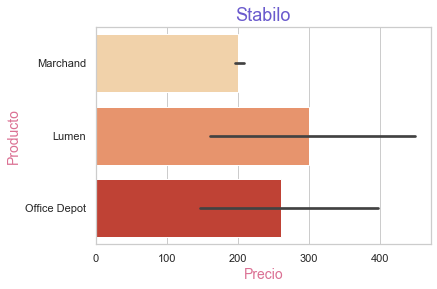

In [35]:
dstabilo=ps.sqldf("select * from datosp where Producto is 'stabilo'")
sns.barplot(x='Precio', y='Autoservicio', data= dstabilo , estimator = np.mean, palette='OrRd')
sns.set(style="whitegrid")
plt.title("Stabilo", color = "slateblue", size = 18)
plt.xlabel("Precio", color = "palevioletred", size = 14)
plt.ylabel("Producto", color = "palevioletred", size = 14)

In [42]:
numstabilo = ps.sqldf("select * from datosp where Producto is 'stabilo'")
ps.sqldf("select Autoservicio, count(Producto) as NumProductos from numstabilo group by Autoservicio")

,Autoservicio,NumProductos
0,Lumen,12
1,Marchand,10
2,Office Depot,15


Para estos graficos, seleccionamos productos especificos que se encontraran en las 3 tiendas, con el fin de comparar los precios individuales de los mismos. 

1. Caja de 12 crayolas, como podemos observar que la diferencia de precios no es muy grande, sin embargo un detalle que debemos mencionar el producto en Lumen se encuentra en un precio más elevado.
2. Paquete de plumones stabilo 0.88 con 10 piezas, a diferencia del producto anterior en esta podemos observar que con respecto a las otras tiendas, la diferencia de precio en Office Depot es notoria.
3. Pegamento Resistol 850 con 225gr, de igual manera, podemos observar que en Office Depot se encuentra en un precio ligeramente más elevado.

Cabe mencionar que en el video mencionamos que comparabamos el producto stabilo porque se encontraba en las 3 tiendas tambien, sin embargo, el dia 9 de febrero se actualizo la página de Lumen y pudimos ver que el producto ya no se encontraba nuestro articulos seleccionado, sin embargo, anteriormente pudimos observar comparar de manera efectiva el producto en las 3  tiendas.

In [40]:
crayola = ps.sqldf("select * from datosp where Nombre is 'CRAYON CRAYOLA REDONDO GRUESO CJ12' or Nombre is 'CRAYONES CRAYOLA JUMBO CON 12' or Nombre is 'CRAYONES CRAYOLA JUMBO (COLORES, 12 PZS.)' ")
stabilo = ps.sqldf("select * from datosp where Nombre is 'PLUMÍN ROTULADOR STABILO POINT 88 / ESTUCHE CON 10 / SURTIDO / PUNTA AGUJA' or Nombre is 'PLUMONES STABILO 8810 POINT 88 CON 10' or Nombre is 'ROTULADORES STABILO POINT 88 (10 PZS.)' ")
resistol = ps.sqldf("select * from datosp where Nombre is 'PEGAMENTO BLANCO RESISTOL 850 225G' or Nombre is 'PEGAMENTO BLANCO ESCOLAR RESISTOL 850 (225GR, 1PZ)' or Nombre is 'PEGAMENTO RESISTOL 850 BLANCO 225GR PZ1' ")

Text(0.5, 1.0, 'Pegamento')

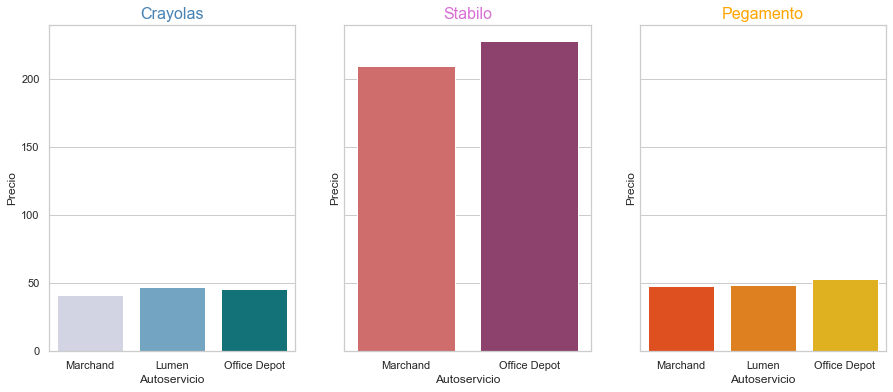

In [41]:
fig, axes = plt.subplots(1, 3,figsize=(15, 6), sharey=True)
sns.set(style="whitegrid")
sns.barplot(ax=axes[0],x='Autoservicio', y='Precio', data= crayola, palette='PuBuGn')
axes[0].set_title("Crayolas",color = "steelblue", size = 16)
sns.barplot(ax=axes[1],x='Autoservicio', y='Precio', data= stabilo, palette='flare')
axes[1].set_title("Stabilo",color = "orchid", size = 16)
sns.barplot(ax=axes[2],x='Autoservicio', y='Precio', data= resistol, palette = 'autumn')
axes[2].set_title("Pegamento",color = "orange", size = 16)